### Merge 15 files on the basis of Product_ean

In [1]:
# Merging Multiple Files Based on 'Product_EAN' Identifier
# This script merges 15 different files (containing a 'Product_EAN' column) into a single dataset. 
# The merge is performed on the 'Product_EAN' field, ensuring that products with the same EAN are combined 
# across all files into one unified DataFrame for further analysis.

import pandas as pd

# List of the specific files you want to read (with full file paths)
file_paths = [
    'altron_28_02_2025.csv',
    'azerty_nl_27_02_2025.csv',
    'bechtle_26_02_2025.csv',
    'conard_26_02_2025.csv',
    'eetgroup_21_02_2025.csv',
    'jacob_26_02_2025.csv',
    'megekko_nl_21_02_2025.csv',
    'mindfactory_products.csv',
    'notebooksbilliger_25_02_2025.csv',
    'office-partner_26_02_2025.csv',
    'orderflow_21_02_2025.csv',
    'proshop_24_02_2025.csv',
    'reichelt_de_26_02_2025.csv',
    'senetic_21_02_2025.csv',
    'verkkokauppa_21_02_2025.csv'
]

# Set to store unique column names across all files
all_columns = set()

# Column mapping to standardize column names
column_mapping = {
    'manufactuer_number': 'manufacturer_number',
    'product_manufacturer_number': 'manufacturer_number',
    'product_manufactuer': 'product_manufacturer',
    'In_Stock': 'in_stock',
    'product_EAN': 'product_ean',
    'product_mpn': 'manufacturer_number',
    'product_manufacturer_code': 'manufacturer_number',
    'manufacturer_product_code': 'manufacturer_number',
    'product_URL': 'product_url'
}

# List to store all the dataframes
all_dataframes = []

# Loop through each file and read it
#Standarize columns
for file in file_paths:
    try:
        # Read the CSV into a dataframe with low_memory=False to suppress DtypeWarnings
        df = pd.read_csv(file, encoding='ISO-8859-1', low_memory=False)  # Adjust encoding if necessary
        
        # Print the name of the shop (file name)
        shop_name = file.split('.')[0]  # Extract shop name (filename without extension)
        print(f"Reading file: {shop_name}")  # Displaying the shop name (file name)
        
        # Standardize column names
        df.columns = [column_mapping.get(col, col) for col in df.columns]
        
        # Add the shop name as a new column (use file name without extension)
        df['shop_name'] = shop_name
        
        # Append the current dataframe to the list
        all_dataframes.append(df)
        
        # Get column names of the current file
        file_columns = set(df.columns)  # Get the column names of the current file
        
        # Add the current file's columns to the set of all columns
        all_columns.update(file_columns)  # Add to the set
        
        # Print columns for the current file
        print(f"Columns in {shop_name}: {file_columns}")
        
        # Print a blank line for separation between files
        print("\n")
        
    except Exception as e:
        print(f"Error reading {file}: {e}")

# After reading all files, combine them into a single dataframe (union of all files)
combined_df = pd.concat(all_dataframes, ignore_index=True)

# Count occurrences of product_ean per shop without removing duplicates
product_ean_counts = combined_df.groupby(['product_ean', 'shop_name']).size().reset_index(name='product_ean_count')

# Drop the 'product_ean_count' column from the combined_df to avoid conflict during merge
combined_df = combined_df.drop(columns=['product_ean_count'], errors='ignore')

# Merge the count back to the original dataframe to show all columns, but only one product_ean_count column
merged_df = pd.merge(combined_df, product_ean_counts, on=['product_ean', 'shop_name'], how='left')

# Drop duplicates based on 'product_ean' within a particular shop, keeping the first occurrence
merged_df = merged_df.drop_duplicates(subset=['product_ean', 'shop_name'], keep='first')

# Reset index after merge to avoid old index confusion
merged_df = merged_df.reset_index(drop=True)  # Ensure that the dataframe uses a new, simple index

# Check the result
display(merged_df)  # Print relevant columns for verification

# Save the merged dataframe to a CSV file
merged_df.to_csv('merged_product_ean_counts.csv', index=False)

# print("Data saved to 'merged_product_ean_counts.csv'")


Reading file: altron_28_02_2025
Columns in altron_28_02_2025: {'product_manufacturer', 'product_ean', 'currency', 'manufacturer_number', 'product_category', 'shop_name', 'product_url', 'product_name', 'product_price', 'in_stock', 'product_article_number'}


Reading file: azerty_nl_27_02_2025
Columns in azerty_nl_27_02_2025: {'product_manufacturer', 'product_ean', 'currency', 'manufacturer_number', 'product_category', 'shop_name', 'product_url', 'product_name', 'product_price', 'in_stock', 'product_article_number'}


Reading file: bechtle_26_02_2025
Columns in bechtle_26_02_2025: {'product_manufacturer', 'product_ean', 'currency', 'manufacturer_number', 'product_category', 'shop_name', 'product_url', 'product_name', 'product_price', 'in_stock', 'product_article_number'}


Reading file: conard_26_02_2025
Columns in conard_26_02_2025: {'product_manufacturer', 'product_ean', 'order_number', 'currency', 'product_category', 'shop_name', 'product_url', 'stock_part_number', 'product_name', 'pr

,product_url,product_name,product_category,product_manufacturer,product_article_number,product_ean,manufacturer_number,product_price,currency,in_stock,...,product_wid,product_oem,product_item_number,vendor_code,product_items_sold,product_SKU,product_model,part_number,unspsc_code,product_ean_count
0,https://alltron.ch/de/product/916769,Axis ZubehÃ¶r C M20 Dichtung Schwarz 10 StÃ¼ck,Home | Netzwerk & Server | Sicherheit & Ãberw...,Axis,916769,7331021045286,5505-941,24.80,CHF,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,https://alltron.ch/de/product/943160,Axis Encoder M7104 4 Kanal,Home | Netzwerk & Server | Sicherheit & Ãberw...,Axis,943160,7331021066397,01679-001,329.10,CHF,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,https://alltron.ch/de/product/677554,Axis Deckenhalterung T91B53 Teleskop ausziehba...,Home | Netzwerk & Server | Sicherheit & Ãberw...,Axis,677554,7331021061798,01189-001,195.00,CHF,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,https://alltron.ch/de/product/1648848,Ubiquiti Wandhalterung Flex Professional Mount...,Home | Netzwerk & Server | Sicherheit & Ãberw...,Ubiquiti,1648848,810084691571,UACC-FLEX-CAM-PWM-BL-3,43.00,CHF,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,https://alltron.ch/de/product/1448797,DJI Enterprise Multikopter Mavic 3 Enterprise ...,Home | Netzwerk & Server | Sicherheit & Ãberw...,DJI Enterprise,1448797,6941565944177,CB.202208180345,3'638.00,CHF,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2501618,https://www.verkkokauppa.com/fi/product/530496...,"Goobay XLR - XLR -kaapeli, 6 m",Etusivu | Kuva ja Ã¤Ã¤ni | Audio- ja videokaap...,Goobay,530496,4040849507151,50715,15.99,EUR,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43202222,1.0
2501619,https://www.verkkokauppa.com/fi/product/530619...,Canon EOS RP -mikrojÃ¤rjestelmÃ¤kamera,Etusivu | Kuva ja Ã¤Ã¤ni | Kamerat ja dronet |...,Canon,530619,4549292132250 | 4549292132151,3380C003,1012.0,EUR,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45121504,1.0
2501620,https://www.verkkokauppa.com/fi/product/530646...,"Takamine GN75CE-TBK -elektroakustinen kitara, ...",Etusivu | Kuva ja Ã¤Ã¤ni | Musiikki | Soittime...,Takamine,530646,0190262040019 | 0190262043164,4210769,699.0,EUR,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2501621,https://www.verkkokauppa.com/fi/product/530649...,"Takamine GN75CE-WR -elektroakustinen kitara, W...",Etusivu | Kuva ja Ã¤Ã¤ni | Musiikki | Soittime...,Takamine,530649,0799493256499 | 0190262040026,4210763,699.0,EUR,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


### Drop Duplicate rows from merged_product_ean_counts file 

In [268]:
# Removing Duplicates Based on Product Identifiers
# This script removes duplicate records in the dataset based on 'product_ean', 'manufacturer_number', and 'product_article_number' columns.

import pandas as pd

# Read the CSV file with low_memory=False to suppress the warning
file_path = 'merged_product_ean_counts.csv'
df1 = pd.read_csv(file_path, low_memory=False)

# Drop duplicate records based on the 'product_ean' column
df1 = df1.drop_duplicates(subset=['product_ean'])
df1 = df1.drop_duplicates(subset=['manufacturer_number'])
df1 = df1.drop_duplicates(subset=['product_article_number'])

# Display the resulting dataframe
display(df1)

,product_url,product_name,product_category,product_manufacturer,product_article_number,product_ean,manufacturer_number,product_price,currency,in_stock,...,product_wid,product_oem,product_item_number,vendor_code,product_items_sold,product_SKU,product_model,part_number,unspsc_code,product_ean_count
0,https://alltron.ch/de/product/916769,Axis ZubehÃ¶r C M20 Dichtung Schwarz 10 StÃ¼ck,Home | Netzwerk & Server | Sicherheit & Ãberw...,Axis,916769,7331021045286,5505-941,24.80,CHF,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,https://alltron.ch/de/product/943160,Axis Encoder M7104 4 Kanal,Home | Netzwerk & Server | Sicherheit & Ãberw...,Axis,943160,7331021066397,01679-001,329.10,CHF,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,https://alltron.ch/de/product/677554,Axis Deckenhalterung T91B53 Teleskop ausziehba...,Home | Netzwerk & Server | Sicherheit & Ãberw...,Axis,677554,7331021061798,01189-001,195.00,CHF,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,https://alltron.ch/de/product/1648848,Ubiquiti Wandhalterung Flex Professional Mount...,Home | Netzwerk & Server | Sicherheit & Ãberw...,Ubiquiti,1648848,810084691571,UACC-FLEX-CAM-PWM-BL-3,43.00,CHF,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,https://alltron.ch/de/product/1448797,DJI Enterprise Multikopter Mavic 3 Enterprise ...,Home | Netzwerk & Server | Sicherheit & Ãberw...,DJI Enterprise,1448797,6941565944177,CB.202208180345,3'638.00,CHF,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2501614,https://www.verkkokauppa.com/fi/product/530355...,"Artline valkotaulukynÃ¤, kaksipÃ¤inen, 8 vÃ¤riÃ¤",Etusivu | Tietotekniikka | Toimisto ja tyÃ¶huo...,Artline,530355,4974052846724,EK-541T/8W / EK-541T/8W 98,21.99,EUR,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2501615,https://www.verkkokauppa.com/fi/product/530373...,"Familon Original -lastentyyny, 40 x 60 cm",Etusivu | Koti ja piha | Lastentarvikkeet | La...,Familon Oy,530373,6438291091133 | 6438291100200,12010120276 / 32400-0005-01-0 / 32400-0005-01-...,23.99,EUR,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56101800,1.0
2501616,https://www.verkkokauppa.com/fi/product/530490...,Boya BY-BM2021 -suuntaava mikrofoni,Etusivu | Kuva ja Ã¤Ã¤ni | Musiikki | Mikrofon...,Boya,530490,6971008021493,BY-BM2021,65.99,EUR,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52161520,1.0
2501620,https://www.verkkokauppa.com/fi/product/530646...,"Takamine GN75CE-TBK -elektroakustinen kitara, ...",Etusivu | Kuva ja Ã¤Ã¤ni | Musiikki | Soittime...,Takamine,530646,0190262040019 | 0190262043164,4210769,699.0,EUR,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


### Shop Count of 15 Files by using product_ean

In [81]:
import pandas as pd
# Adding Shop Count Based on 'Product_EAN' to DataFrame
# This script counts the occurrences of each 'product_ean' in the merged dataset and adds the 'shop_count' to the dataframe.

# Count the occurrences of each 'product_ean' in merged_df
product_shop_count = merged_df.groupby('product_ean').size().reset_index(name='shop_count')

# Merge the 'shop_count' back into df1
df1_with_counts = pd.merge(df1, product_shop_count, on='product_ean', how='left')

# Display the resulting dataframe
display(df1_with_counts)

,product_url,product_name,product_category,product_manufacturer,product_article_number,product_ean,manufacturer_number,product_price,currency,in_stock,...,product_oem,product_item_number,vendor_code,product_items_sold,product_SKU,product_model,part_number,unspsc_code,product_ean_count,shop_count
0,https://alltron.ch/de/product/916769,Axis ZubehÃ¶r C M20 Dichtung Schwarz 10 StÃ¼ck,Home | Netzwerk & Server | Sicherheit & Ãberw...,Axis,916769,7331021045286,5505-941,24.80,CHF,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0
1,https://alltron.ch/de/product/943160,Axis Encoder M7104 4 Kanal,Home | Netzwerk & Server | Sicherheit & Ãberw...,Axis,943160,7331021066397,01679-001,329.10,CHF,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0
2,https://alltron.ch/de/product/677554,Axis Deckenhalterung T91B53 Teleskop ausziehba...,Home | Netzwerk & Server | Sicherheit & Ãberw...,Axis,677554,7331021061798,01189-001,195.00,CHF,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0
3,https://alltron.ch/de/product/1648848,Ubiquiti Wandhalterung Flex Professional Mount...,Home | Netzwerk & Server | Sicherheit & Ãberw...,Ubiquiti,1648848,810084691571,UACC-FLEX-CAM-PWM-BL-3,43.00,CHF,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
4,https://alltron.ch/de/product/1448797,DJI Enterprise Multikopter Mavic 3 Enterprise ...,Home | Netzwerk & Server | Sicherheit & Ãberw...,DJI Enterprise,1448797,6941565944177,CB.202208180345,3'638.00,CHF,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036420,https://www.verkkokauppa.com/fi/product/530355...,"Artline valkotaulukynÃ¤, kaksipÃ¤inen, 8 vÃ¤riÃ¤",Etusivu | Tietotekniikka | Toimisto ja tyÃ¶huo...,Artline,530355,4974052846724,EK-541T/8W / EK-541T/8W 98,21.99,EUR,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
1036421,https://www.verkkokauppa.com/fi/product/530373...,"Familon Original -lastentyyny, 40 x 60 cm",Etusivu | Koti ja piha | Lastentarvikkeet | La...,Familon Oy,530373,6438291091133 | 6438291100200,12010120276 / 32400-0005-01-0 / 32400-0005-01-...,23.99,EUR,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56101800,1.0,1.0
1036422,https://www.verkkokauppa.com/fi/product/530490...,Boya BY-BM2021 -suuntaava mikrofoni,Etusivu | Kuva ja Ã¤Ã¤ni | Musiikki | Mikrofon...,Boya,530490,6971008021493,BY-BM2021,65.99,EUR,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52161520,1.0,1.0
1036423,https://www.verkkokauppa.com/fi/product/530646...,"Takamine GN75CE-TBK -elektroakustinen kitara, ...",Etusivu | Kuva ja Ã¤Ã¤ni | Musiikki | Soittime...,Takamine,530646,0190262040019 | 0190262043164,4210769,699.0,EUR,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0


In [83]:

# Get the maximum shop count
max_shop_count = df1_with_counts['shop_count'].max()

# Print the maximum shop count
print("Maximum shop count:", max_shop_count)

Maximum shop count: 8.0


### Merging 6 files on the basis of manufacturer_number

In [85]:
import pandas as pd

# Merging Manufacturer-Based Data from Multiple Shops with Column Standardization
# This script reads six CSV files lacking 'product_ean', standardizes column names, merges data based on 'manufacturer_number',
# counts occurrences per shop, removes duplicates within shops, and exports the consolidated dataset.

# List of file names
#Following six files do not contain product_ean therefore using manufacturer_number
file_names = [
    'alza_26_02_2025.csv',
    'cancom_21_02_2025.csv',
    'cyberport_25_02_2025.csv',
    'digitech_21_02_2025.csv',
    'galaxus_26_02_2025.csv',
    'Mironet_21_02_2025.csv'
]

# Dictionary to map old column names to new column names
column_mapping = {
    'product_sku': 'product_SKU',
    'price': 'product_price',
    'item_number': 'product_item_number',
    'manufacture_number': 'manufacturer_number',
    'product_manufacturer_number': 'manufacturer_number',
    'product_mpn': 'manufacturer_number'
}

# Set to store unique column names across all files
unique_columns = set()

# Initialize a list to store data from all files
all_data = []

# Loop through each file and read it
# Standarize column names
for file in file_names:
    try:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file, encoding='ISO-8859-1', low_memory=False)  # Adjust encoding and memory setting
        
        # Rename columns based on the mapping
        df.rename(columns=column_mapping, inplace=True)
        
        # Add a column to indicate the full shop name (entire file name without extension)
        shop_name = file.split('.')[0]  # Take the full file name without the extension
        df['shop_name'] = shop_name  # Assign the full file name as shop_name
        
        # Append the dataframe to the all_data list
        all_data.append(df)
        
        # Get the updated columns for the current file
        file_columns = set(df.columns)  # Get the column names of the current file
        unique_columns.update(file_columns)  # Add to the set of unique columns
        
        # Print the columns for the current file
        print(f"Updated Columns in {file.split('/')[-1]}: {file_columns}")
        print("\n")  # Blank line for separation between files

    except Exception as e:
        print(f"Error reading {file}: {e}")

# Concatenate all dataframes into one dataframe
all_data_df = pd.concat(all_data, ignore_index=True)

# Perform the union of files based on manufacturer_number and count the occurrences of manufacturer_number in each shop
manufacturer_counts = all_data_df.groupby(['manufacturer_number', 'shop_name']).size().reset_index(name='manu_num_count')

# Merge the manufacturer counts back to the original data
merged_df1 = pd.merge(all_data_df, manufacturer_counts, on=['manufacturer_number', 'shop_name'], how='left')

# Drop duplicates based on 'product_ean' (or 'manufacturer_number') within a particular shop, keeping the first occurrence
merged_df1 = merged_df1.drop_duplicates(subset=['manufacturer_number', 'shop_name'], keep='first')

# Print the final merged data
print("\nMerged Data (without duplicates):")
display(merged_df1)

# Export the merged data to a new CSV file
merged_df1.to_csv('merged_manufacturer_data.csv', index=False)

# Display unique column names across all files
print("\nUnique columns across all files:")
print(unique_columns)


Updated Columns in alza_26_02_2025.csv: {'product_manufacturer', 'currency', 'manufacturer_number', 'product_category', 'shop_name', 'product_url', 'product_code', 'product_name', 'product_price', 'in_stock'}


Updated Columns in cancom_21_02_2025.csv: {'product_manufacturer', 'currency', 'manufacturer_number', 'product_category', 'shop_name', 'product_url', 'product_name', 'product_price', 'in_stock', 'product_article_number'}


Updated Columns in cyberport_25_02_2025.csv: {'product_manufacturer', 'currency', 'manufacturer_number', 'product_category', 'shop_name', 'product_url', 'product_name', 'product_price', 'in_stock', 'product_article_number'}


Updated Columns in digitech_21_02_2025.csv: {'product_manufacturer', 'product_item_number', 'currency', 'manufacturer_number', 'product_category', 'shop_name', 'product_url', 'product_name', 'product_price', 'in_stock'}


Updated Columns in galaxus_26_02_2025.csv: {'product_manufacturer', 'currency', 'manufacturer_number', 'product_catego

,product_url,product_name,product_category,product_manufacturer,product_code,manufacturer_number,product_price,currency,in_stock,shop_name,product_article_number,product_item_number,product_SKU,manu_num_count
0,https://www.alza.cz/maxi/abena-light-extra-3-v...,"Abena Light Extra 3 vloÅ¾ky absorpÄnÃ­, 500 m...",Alza | Drogerie | HygienickÃ© potÅeby | Inkon...,Abena,SPToth0294,4819307,71,CZK,Yes,alza_26_02_2025,NaN,NaN,NaN,1.0
1,https://www.alza.cz/hracky/tender-leaf-sada-dr...,Tender Leaf Sada dÅevÄnÃ½ch polÃ¡rnÃ­ch zvÃ­...,Alza | HraÄky a vÃ½bava pro miminka | HraÄky...,Tender Leaf,HRAdre112,TL8484,1Â 529,CZK,No,alza_26_02_2025,NaN,NaN,NaN,1.0
2,https://www.alza.cz/auto/sparco-k-pole-cerno-m...,"Sparco K-Pole Äerno-modrÃ©, vel. 40",Alza | Auto-moto | ZÃ¡vodnÃ­ obleÄenÃ­ | ZÃ¡v...,SPARCO,MOTOspar057,00126940NRAZ,2Â 450,CZK,No,alza_26_02_2025,NaN,NaN,NaN,1.0
3,https://www.alza.cz/hobby/kaptan-frote-osuska-...,Kaptan FrotÃ© osuÅ¡ka NBA Los Angeles Lakers,"Alza | DÅ¯m, dÃ­lna a zahrada | NÃ¡bytek | Byt...",Kaptan,CHAosu06,005533-010,389,CZK,Yes,alza_26_02_2025,NaN,NaN,NaN,1.0
4,https://www.alza.cz/vention-liquid-silicone-ca...,Vention Liquid Silicone Case for iPhone 15 Pro...,"Alza | Mobily, chytrÃ© hodinky a tablety | PÅ...",Vention,VENTbb83,KUFG0-40,359,CZK,Yes,alza_26_02_2025,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643856,https://www.mironet.cz/navitas-leginy-womens-l...,Navitas LegÃ­ny Womens Leggings Light Green L,Sport a outdoor | RybÃ¡ÅskÃ© potÅeby | ObleÄ...,Navitas,NaN,NTBJ4015-L,799,Czech Koruna (KÄ),Yes,Mironet_21_02_2025,97351807,NaN,97351807,1.0
1643857,https://www.mironet.cz/navitas-leginy-womens-l...,Navitas LegÃ­ny Womens Leggings Light Green M,Sport a outdoor | RybÃ¡ÅskÃ© potÅeby | ObleÄ...,Navitas,NaN,NTBJ4015-M,799,Czech Koruna (KÄ),Yes,Mironet_21_02_2025,97351806,NaN,97351806,1.0
1643858,https://www.mironet.cz/navitas-leginy-womens-l...,Navitas LegÃ­ny Womens Leggings Light Green XL,Sport a outdoor | RybÃ¡ÅskÃ© potÅeby | ObleÄ...,Navitas,NaN,NTBJ4015-XL,799,Czech Koruna (KÄ),Yes,Mironet_21_02_2025,97351808,NaN,97351808,1.0
1643859,https://www.mironet.cz/navitas-kratasy-identit...,Navitas KraÅ¥asy Identity Camo Jogger Shorts 3XL,Sport a outdoor | RybÃ¡ÅskÃ© potÅeby | ObleÄ...,Navitas,NaN,NTBS4105-3XL,699,Czech Koruna (KÄ),No,Mironet_21_02_2025,97351798,NaN,97351798,1.0



Unique columns across all files:
{'product_manufacturer', 'product_item_number', 'currency', 'manufacturer_number', 'shop_name', 'product_code', 'in_stock', 'product_SKU', 'product_category', 'product_url', 'product_name', 'product_price', 'product_article_number'}


### Drop Duplicate Rows from merged_manufacturer_data file on the basis of manufacturer_number

In [87]:
import pandas as pd

# Removing Duplicates Based on Manufacturer and Article Numbers
# This script removes duplicate records from the dataset based on 'manufacturer_number' and 'product_article_number'.

# Read the CSV file with low_memory=False to suppress the warning
file_path = 'merged_manufacturer_data.csv'
df2 = pd.read_csv(file_path, low_memory=False)

# Drop duplicate records based on the 'product_ean' column
df2 = df2.drop_duplicates(subset=['manufacturer_number'])
df2 = df2.drop_duplicates(subset=['product_article_number'])

# Display the resulting dataframe
display(df2)


,product_url,product_name,product_category,product_manufacturer,product_code,manufacturer_number,product_price,currency,in_stock,shop_name,product_article_number,product_item_number,product_SKU,manu_num_count
0,https://www.alza.cz/maxi/abena-light-extra-3-v...,"Abena Light Extra 3 vloÅ¾ky absorpÄnÃ­, 500 m...",Alza | Drogerie | HygienickÃ© potÅeby | Inkon...,Abena,SPToth0294,4819307,71,CZK,Yes,alza_26_02_2025,NaN,NaN,NaN,1.0
612539,https://shop.cancom.de/de/Eingabe-Input/Mouse-...,V7 MU200-1E Low Profile Mouse USB Schwarz,Eingabe / Input | Mouse & Keyboard,V7,NaN,MU200-1E,7.03,EUR,Yes,cancom_21_02_2025,167975,NaN,NaN,1.0
612540,https://shop.cancom.de/de/Eingabe-Input/Mouse-...,KC 6000 Slim Corded Keyboard USB schwarz Layou...,Eingabe / Input | Mouse & Keyboard,Cherry,NaN,JK-1600DE-2,34.51,EUR,Yes,cancom_21_02_2025,168855,NaN,NaN,1.0
612541,https://shop.cancom.de/de/c/B110-Silent-Maus-r...,B110 Silent Maus rechts und linkshÃ¤ndig optisch,Eingabe / Input | Mouse & Keyboard,Logitech,NaN,910-005508,11.33,EUR,Yes,cancom_21_02_2025,174185,NaN,NaN,1.0
612543,https://shop.cancom.de/de/Eingabe-Input/Mouse-...,Pebble M350 Wireless Bluetooth Maus Rosa inkl....,Eingabe / Input | Mouse & Keyboard,Logitech,NaN,910-005717,22.24,EUR,Yes,cancom_21_02_2025,190867,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553290,https://www.mironet.cz/navitas-leginy-womens-l...,Navitas LegÃ­ny Womens Leggings Light Green L,Sport a outdoor | RybÃ¡ÅskÃ© potÅeby | ObleÄ...,Navitas,NaN,NTBJ4015-L,799,Czech Koruna (KÄ),Yes,Mironet_21_02_2025,97351807,NaN,97351807.0,1.0
1553291,https://www.mironet.cz/navitas-leginy-womens-l...,Navitas LegÃ­ny Womens Leggings Light Green M,Sport a outdoor | RybÃ¡ÅskÃ© potÅeby | ObleÄ...,Navitas,NaN,NTBJ4015-M,799,Czech Koruna (KÄ),Yes,Mironet_21_02_2025,97351806,NaN,97351806.0,1.0
1553292,https://www.mironet.cz/navitas-leginy-womens-l...,Navitas LegÃ­ny Womens Leggings Light Green XL,Sport a outdoor | RybÃ¡ÅskÃ© potÅeby | ObleÄ...,Navitas,NaN,NTBJ4015-XL,799,Czech Koruna (KÄ),Yes,Mironet_21_02_2025,97351808,NaN,97351808.0,1.0
1553293,https://www.mironet.cz/navitas-kratasy-identit...,Navitas KraÅ¥asy Identity Camo Jogger Shorts 3XL,Sport a outdoor | RybÃ¡ÅskÃ© potÅeby | ObleÄ...,Navitas,NaN,NTBS4105-3XL,699,Czech Koruna (KÄ),No,Mironet_21_02_2025,97351798,NaN,97351798.0,1.0


### Shop Count of 6 Files Products by using Product Manufacturer Number

In [89]:
import pandas as pd

#  Adding Shop Count Based on 'Manufacturer_Number' to DataFrame
#  This script calculates how many shops each 'manufacturer_number' appears in and merges this count into the dataframe.

# Count the occurrences of each 'product_ean' in merged_df
product_shop_count = merged_df1.groupby('manufacturer_number').size().reset_index(name='shop_count')

# Merge the 'shop_count' back into df1
df2_with_counts = pd.merge(df2, product_shop_count, on='manufacturer_number', how='left')

# Display the resulting dataframe
display(df2_with_counts)


,product_url,product_name,product_category,product_manufacturer,product_code,manufacturer_number,product_price,currency,in_stock,shop_name,product_article_number,product_item_number,product_SKU,manu_num_count,shop_count
0,https://www.alza.cz/maxi/abena-light-extra-3-v...,"Abena Light Extra 3 vloÅ¾ky absorpÄnÃ­, 500 m...",Alza | Drogerie | HygienickÃ© potÅeby | Inkon...,Abena,SPToth0294,4819307,71,CZK,Yes,alza_26_02_2025,NaN,NaN,NaN,1.0,1
1,https://shop.cancom.de/de/Eingabe-Input/Mouse-...,V7 MU200-1E Low Profile Mouse USB Schwarz,Eingabe / Input | Mouse & Keyboard,V7,NaN,MU200-1E,7.03,EUR,Yes,cancom_21_02_2025,167975,NaN,NaN,1.0,2
2,https://shop.cancom.de/de/Eingabe-Input/Mouse-...,KC 6000 Slim Corded Keyboard USB schwarz Layou...,Eingabe / Input | Mouse & Keyboard,Cherry,NaN,JK-1600DE-2,34.51,EUR,Yes,cancom_21_02_2025,168855,NaN,NaN,1.0,3
3,https://shop.cancom.de/de/c/B110-Silent-Maus-r...,B110 Silent Maus rechts und linkshÃ¤ndig optisch,Eingabe / Input | Mouse & Keyboard,Logitech,NaN,910-005508,11.33,EUR,Yes,cancom_21_02_2025,174185,NaN,NaN,1.0,3
4,https://shop.cancom.de/de/Eingabe-Input/Mouse-...,Pebble M350 Wireless Bluetooth Maus Rosa inkl....,Eingabe / Input | Mouse & Keyboard,Logitech,NaN,910-005717,22.24,EUR,Yes,cancom_21_02_2025,190867,NaN,NaN,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739849,https://www.mironet.cz/navitas-leginy-womens-l...,Navitas LegÃ­ny Womens Leggings Light Green L,Sport a outdoor | RybÃ¡ÅskÃ© potÅeby | ObleÄ...,Navitas,NaN,NTBJ4015-L,799,Czech Koruna (KÄ),Yes,Mironet_21_02_2025,97351807,NaN,97351807.0,1.0,1
739850,https://www.mironet.cz/navitas-leginy-womens-l...,Navitas LegÃ­ny Womens Leggings Light Green M,Sport a outdoor | RybÃ¡ÅskÃ© potÅeby | ObleÄ...,Navitas,NaN,NTBJ4015-M,799,Czech Koruna (KÄ),Yes,Mironet_21_02_2025,97351806,NaN,97351806.0,1.0,1
739851,https://www.mironet.cz/navitas-leginy-womens-l...,Navitas LegÃ­ny Womens Leggings Light Green XL,Sport a outdoor | RybÃ¡ÅskÃ© potÅeby | ObleÄ...,Navitas,NaN,NTBJ4015-XL,799,Czech Koruna (KÄ),Yes,Mironet_21_02_2025,97351808,NaN,97351808.0,1.0,1
739852,https://www.mironet.cz/navitas-kratasy-identit...,Navitas KraÅ¥asy Identity Camo Jogger Shorts 3XL,Sport a outdoor | RybÃ¡ÅskÃ© potÅeby | ObleÄ...,Navitas,NaN,NTBS4105-3XL,699,Czech Koruna (KÄ),No,Mironet_21_02_2025,97351798,NaN,97351798.0,1.0,1


In [91]:

# Get the maximum shop count
max_shop_count = df2_with_counts['shop_count'].max()

# Print the maximum shop count
print("Maximum shop count:", max_shop_count)

Maximum shop count: 5


### bueromarkt_26_02_2025 has no columns for product_ean & manufacturer_number therefore processing using product_article_number

In [93]:
import pandas as pd

# Dictionary to map old column names to new column names
column_mapping = {
    'product_sku': 'product_SKU',
    'price': 'product_price',
    'item_number': 'product_item_number',
    'manufacture_number': 'manufacturer_number',
    'product_manufacturer_number': 'manufacturer_number',
    'product_mpn': 'manufacturer_number',
    'product_article_number': 'product_article_number'  # Standardize product_article_number
}

# Read the bueromarkt_26_02_2025.csv file and standardize necessary columns
bueromarkt_df = pd.read_csv('bueromarkt_26_02_2025.csv', encoding='ISO-8859-1', low_memory=False)

# Rename columns based on the mapping
bueromarkt_df.rename(columns=column_mapping, inplace=True)

# Add the shop name for the bueromarkt file
bueromarkt_df['shop_name'] = 'bueromarkt_26_02_2025'

# Step 2: Drop duplicates based on 'product_article_number' within each shop
# Keep the first occurrence of each 'product_article_number' within each 'shop_name'
bueromarkt_df = bueromarkt_df.drop_duplicates(subset=['product_article_number', 'shop_name'], keep='first')

# Step 3: Count how many times each 'product_article_number' appears in each 'shop_name'
product_article_count = bueromarkt_df.groupby(['product_article_number', 'shop_name']).size().reset_index(name='shop_count')

# Merge the count back into the original dataframe
bueromarkt_df = pd.merge(bueromarkt_df, product_article_count, on=['product_article_number', 'shop_name'], how='left')

# Print the final dataframe with shop count
print("\nFinal Data with Shop Count for Each Article Number:")
print(bueromarkt_df)

# Export the final dataframe to a new CSV file
bueromarkt_df.to_csv('bueromarkt_with_shop_count.csv', index=False)


Final Data with Shop Count for Each Article Number:
                                             product_url  \
0      https://www.bueromarkt-ag.de//farbband_kmp_005...   
1      https://www.bueromarkt-ag.de//thermoetiketten_...   
2      https://www.bueromarkt-ag.de//thermoetiketten_...   
3      https://www.bueromarkt-ag.de//thermoetiketten_...   
4      https://www.bueromarkt-ag.de//thermoetiketten_...   
...                                                  ...   
85894  https://www.bueromarkt-ag.de//zeckenzange_may_...   
85895  https://www.bueromarkt-ag.de//zeckenzange_inst...   
85896  https://www.bueromarkt-ag.de//zeckenzange_schw...   
85897  https://www.bueromarkt-ag.de//zeckenzange_blue...   
85898  https://www.bueromarkt-ag.de//zeckenzange_sara...   

                                            product_name  \
0      KMP 0051 0101 Farbband 51N S+U fÃ¼r Canon schwarz   
1      Thermoetiketten fÃ¼r Zebra 800284-605, 101,6 x...   
2      BÃ¶ttcher-AG Thermoetiketten fÃ¼r Zebra

### Final Master Data

In [139]:
# Concatenating DataFrames and Exporting Final Master Dataset
# This script concatenates multiple dataframes vertically, filters the relevant columns,
# and exports the final consolidated dataset to a CSV file for further use.

import pandas as pd
import warnings

# Suppress the specific FutureWarning related to DataFrame concatenation
warnings.simplefilter(action='ignore', category=FutureWarning)

# Assuming df1_with_counts, df2_with_counts, and bueromarkt_df are already defined

# Concatenate the three dataframes vertically
final_df = pd.concat([df1_with_counts, df2_with_counts, bueromarkt_df], axis=0, ignore_index=True)

# Display the concatenated dataframe
print("\nConcatenated Dataframe:")
display(final_df)

# Select only the required columns
required_columns = [
    'product_url', 'product_name', 'product_category', 'product_manufacturer',
    'product_article_number', 'product_ean', 'manufacturer_number',
    'product_price', 'currency', 'in_stock', 'shop_name',
    'stock_part_number', 'shop_count'
]

final_filtered_df = final_df[required_columns]
# final_filtered_df

# Step 1: Export the filtered dataframe to a new CSV file
final_filtered_df.to_csv('final_master_data.csv', index=False)

# # Step 2: Export the filtered dataframe to an Excel file
# final_filtered_df.to_excel('final_master_data.xlsx', index=False, engine='openpyxl')

print("Data has been exported to 'final_master_data.csv")



Concatenated Dataframe:


,product_url,product_name,product_category,product_manufacturer,product_article_number,product_ean,manufacturer_number,product_price,currency,in_stock,...,vendor_code,product_items_sold,product_SKU,product_model,part_number,unspsc_code,product_ean_count,shop_count,product_code,manu_num_count
0,https://alltron.ch/de/product/916769,Axis ZubehÃ¶r C M20 Dichtung Schwarz 10 StÃ¼ck,Home | Netzwerk & Server | Sicherheit & Ãberw...,Axis,916769,7331021045286,5505-941,24.80,CHF,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,NaN,NaN
1,https://alltron.ch/de/product/943160,Axis Encoder M7104 4 Kanal,Home | Netzwerk & Server | Sicherheit & Ãberw...,Axis,943160,7331021066397,01679-001,329.10,CHF,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN
2,https://alltron.ch/de/product/677554,Axis Deckenhalterung T91B53 Teleskop ausziehba...,Home | Netzwerk & Server | Sicherheit & Ãberw...,Axis,677554,7331021061798,01189-001,195.00,CHF,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN
3,https://alltron.ch/de/product/1648848,Ubiquiti Wandhalterung Flex Professional Mount...,Home | Netzwerk & Server | Sicherheit & Ãberw...,Ubiquiti,1648848,810084691571,UACC-FLEX-CAM-PWM-BL-3,43.00,CHF,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN
4,https://alltron.ch/de/product/1448797,DJI Enterprise Multikopter Mavic 3 Enterprise ...,Home | Netzwerk & Server | Sicherheit & Ãberw...,DJI Enterprise,1448797,6941565944177,CB.202208180345,3'638.00,CHF,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1862173,https://www.bueromarkt-ag.de//zeckenzange_may_...,"May Zeckenzange PI-0084, fÃ¼r Mensch und Tier,...",Home | Drogerie | Zeckenzange,May,pi0084,NaN,NaN,"9,99",EUR,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1862174,https://www.bueromarkt-ag.de//zeckenzange_inst...,"InstrumenteNRW Zeckenzange PI-F-052, fÃ¼r Mens...",Home | Drogerie | Zeckenzange,InstrumenteNRW,pizf052,NaN,NaN,"5,99",EUR,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1862175,https://www.bueromarkt-ag.de//zeckenzange_schw...,"Schwertkrone Zeckenzange Zecken-Set 4-teilig, ...",Home | Drogerie | Zeckenzange,Schwertkrone,zz01401,NaN,NaN,"10,99",EUR,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1862176,https://www.bueromarkt-ag.de//zeckenzange_blue...,"BluePet Zeckenzange Tick Tweezer, 2 StÃ¼ck, fÃ...",Home | Drogerie | Zeckenzange,BluePet,80ngh9z5jw,NaN,NaN,"6,49",EUR,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


Data has been exported to 'final_master_data.csv


In [141]:
# Get the maximum shop count
max_shop_count = final_df['shop_count'].max()

# Print the maximum shop count
print("Maximum shop count:", max_shop_count)

Maximum shop count: 8.0


### Q#1 Most common products across the market
##### Which products are offered by the majority of shops?

In [143]:
# E-commerce Product Market Analysis and Export
# This script processes the provided e-commerce product data to calculate the total 'shop_count' 
# for each product based on 'manufacturer_number' and 'product_article_number'. It then 
# selects the top 10,000 most common products across the market, filters the relevant columns, 
# and exports the results to an Excel file for further analysis.

import pandas as pd

# Assuming `final_df` is your DataFrame

# Step 1: Sum 'shop_count' for repeated 'manufacturer_number' and 'product_article_number'
final_df['shop_count'] = final_df.groupby('manufacturer_number')['shop_count'].transform('sum')
final_df['shop_count'] = final_df.groupby('product_article_number')['shop_count'].transform('sum')

# Step 2: Get the top 5000 records sorted by the updated 'shop_count'
top_10000 = final_df.sort_values(by='shop_count', ascending=False).head(10000)

# Step 3: Select only the required columns
required_columns = [
    'product_url', 'product_name', 'product_category', 'product_manufacturer',
    'product_article_number', 'product_ean', 'manufacturer_number',
    'product_price', 'currency', 'in_stock', 'shop_name',
    'stock_part_number', 'shop_count'
]
top_10000_filtered = top_10000[required_columns]

# Display the filtered top 5000 records
display(top_10000_filtered)

# Step 4: Save the result as an Excel file
top_10000_filtered.to_excel('most_common_products_across_the_market.xlsx', index=False, engine='openpyxl')

print("Data has been exported to 'top_10000_records.xlsx'")


,product_url,product_name,product_category,product_manufacturer,product_article_number,product_ean,manufacturer_number,product_price,currency,in_stock,shop_name,stock_part_number,shop_count
1042379,https://shop.cancom.de/de/c/Docking-Station-WD...,Docking Station WD19S 130W,Mobile Computing | ZubehÃ¶r,DELL,208673,NaN,DELL-WD19S130W,225.06,EUR,Yes,cancom_21_02_2025,NaN,18.0
14064,https://alltron.ch/de/product/208673,Aten KVM Switch CS1794,Home | Netzwerk & Server | Netzwerk | KVM-Syst...,Aten,208673,4710423775718,CS1794,299.00,CHF,Yes,altron_28_02_2025,NaN,18.0
70369,https://alltron.ch/de/product/125962,Jabra Anschlusskabel fÃ¼r Cisco IP RJ-10 - QD...,Home | Telco & UCC | Headsets | Headset-ZubehÃ...,Jabra,125962,5706991002089,8800-01-37,29.20,CHF,Yes,altron_28_02_2025,NaN,17.0
1038992,https://shop.cancom.de/de/c/KC-1000-USB-Tastat...,KC 1000 USB Tastatur Englisch Grau,Eingabe / Input | Mouse & Keyboard,Cherry,125962,NaN,JK-0800EU-0,17.28,EUR,Yes,cancom_21_02_2025,NaN,17.0
1042043,https://shop.cancom.de/de/Netzwerk/KVM-Switche...,4 Port HDMI Switch 3x HDMI & 1x DisplayPort 4K...,Netzwerk | KVM-Switches,StarTech.com,192094,NaN,VS421HDDP,100.39,EUR,Yes,cancom_21_02_2025,NaN,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
252888,https://azerty.nl/product/print-brother-hl-l24...,print Brother HL-L2447DW SFP-LaserA4,Home | Randapparatuur | Printers | Laserprinters,BROTHER,6165287.0,4977766831086,HLL2447DWRE1,192.139531,EUR,Yes,azerty_nl_27_02_2025,NaN,6.0
18083,https://alltron.ch/de/product/1647418,ASUS Mainboard Pro WS TRX50-SAGE WIFI,Home | Computing & Software | PC-Komponenten |...,ASUS,1647418,4711387402726,90MB1FZ0-M0EAY0,879.00,CHF,Yes,altron_28_02_2025,NaN,6.0
15534,https://alltron.ch/de/product/1018179,Delock USB 2.0-Kabel mit Ferritkern USB A - US...,Home | Computing & Software | PC-Kabel & -Adap...,Delock,1018179,4043619848966,84896,6.95,CHF,Yes,altron_28_02_2025,NaN,6.0
1041854,https://shop.cancom.de/de/Netzwerk/WLAN-Access...,HPE AP-515 (RW) Unified AP,Netzwerk | WLAN Accesspoint & Repeater,Aruba,176158,NaN,Q9H62A,1787.28,EUR,Yes,cancom_21_02_2025,NaN,6.0


Data has been exported to 'top_10000_records.xlsx'


In [145]:
# Get the maximum shop count
max_shop_count = top_10000_filtered['shop_count'].max()

# Print the maximum shop count
print("Maximum shop count:", max_shop_count)

Maximum shop count: 18.0


### Q#2. Assortment overlap
##### How many and which products from our assortment are also listed in external shops?
##### What is the percentage of overlap?

In [129]:
# Kosatec Portfolio Overlap Analysis
# This script compares Kosatec's product portfolio (from the 'Kosatec_Portfolio_2.csv' file) with an external market dataset (final_df).
# It identifies overlapping products based on matching identifiers: product EAN, manufacturer number, and product article number.

import pandas as pd

# Load Kosatec Portfolio
kosatec_df = pd.read_csv('Kosatec_Portfolio_2.csv', encoding='ISO-8859-1', low_memory=False)

# Standardize and rename columns
kosatec_df.columns = [col.strip().lower().replace(" ", "_") for col in kosatec_df.columns]
kosatec_df.rename(columns={
    'product_code': 'product_article_number',
    'product_ean': 'product_ean',
    'manufacturer_number': 'manufacturer_number'
}, inplace=True)

# Ensure both DataFrames have string identifiers
for col in ['product_ean', 'manufacturer_number', 'product_article_number']:
    kosatec_df[col] = kosatec_df[col].astype(str)
    final_df[col] = final_df[col].astype(str)

# Create boolean masks for overlap
match_ean = kosatec_df['product_ean'].isin(final_df['product_ean'])
match_manu = kosatec_df['manufacturer_number'].isin(final_df['manufacturer_number'])
match_article = kosatec_df['product_article_number'].isin(final_df['product_article_number'])

# Combine masks to get any match
overlap_mask = match_ean | match_manu | match_article

# Filter only matched rows from Kosatec
matched_kosatec_products = kosatec_df[overlap_mask].copy()

# Calculate stats
total_products = len(kosatec_df)
matched_count = len(matched_kosatec_products)
overlap_percent = (matched_count / total_products) * 100

# Display stats
print(" Total Kosatec Products:", total_products)
print(" Overlapping Products:", matched_count)
print(" Overlap Percentage: {:.2f}%".format(overlap_percent))

# Save matched products
matched_kosatec_products.to_csv('kosatec_overlapping_products.csv', index=False)
print(" Matched products saved to 'kosatec_overlapping_products.csv'")

 Total Kosatec Products: 23968
 Overlapping Products: 20315
 Overlap Percentage: 84.76%
 Matched products saved to 'kosatec_overlapping_products.csv'


### Comparison of Kosatec Products and Overlap with External Shops Graph

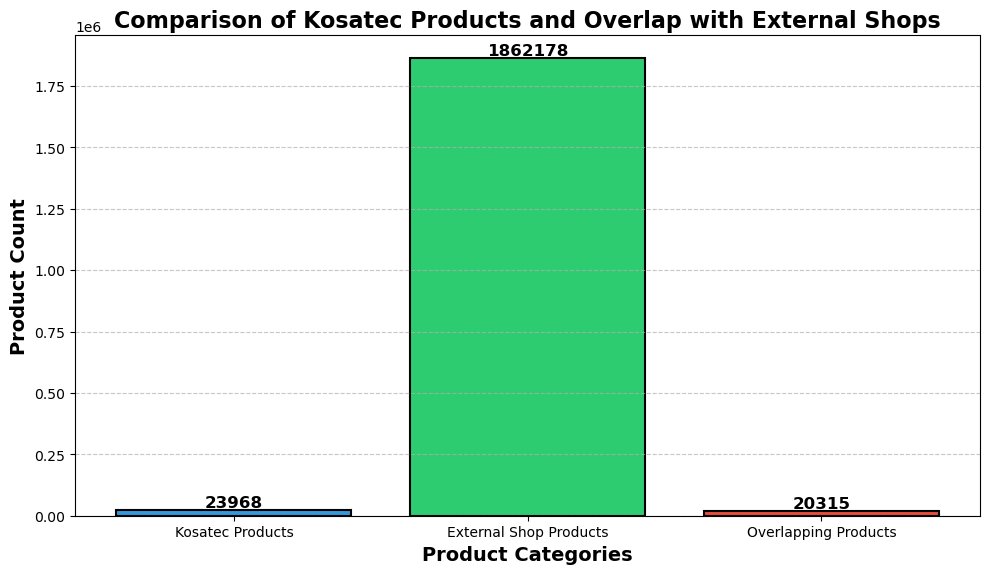

In [131]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Kosatec Portfolio
kosatec_df = pd.read_csv('Kosatec_Portfolio_2.csv', encoding='ISO-8859-1', low_memory=False)

# Standardize and rename columns
kosatec_df.columns = [col.strip().lower().replace(" ", "_") for col in kosatec_df.columns]
kosatec_df.rename(columns={
    'product_code': 'product_article_number',
    'product_ean': 'product_ean',
    'manufacturer_number': 'manufacturer_number'
}, inplace=True)

# Ensure both DataFrames have string identifiers
for col in ['product_ean', 'manufacturer_number', 'product_article_number']:
    kosatec_df[col] = kosatec_df[col].astype(str)
    final_df[col] = final_df[col].astype(str)

# Create boolean masks for overlap
match_ean = kosatec_df['product_ean'].isin(final_df['product_ean'])
match_manu = kosatec_df['manufacturer_number'].isin(final_df['manufacturer_number'])
match_article = kosatec_df['product_article_number'].isin(final_df['product_article_number'])

# Combine masks to get any match
overlap_mask = match_ean | match_manu | match_article

# Filter only matched rows from Kosatec
matched_kosatec_products = kosatec_df[overlap_mask].copy()

# Calculate stats
total_kosatec_products = len(kosatec_df)
total_external_products = len(final_df)  # Assuming final_df contains all external shop products
matched_count = len(matched_kosatec_products)
overlap_percent = (matched_count / total_kosatec_products) * 100

# Calculate unique products
unique_kosatec = total_kosatec_products - matched_count
unique_external = total_external_products - matched_count

# Data for bar chart
labels = ['Kosatec Products', 'External Shop Products', 'Overlapping Products']
values = [total_kosatec_products, total_external_products, matched_count]

# Create a more attractive bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size for readability

# Bar colors and custom edges
bar_colors = ['#3498db', '#2ecc71', '#e74c3c']
bars = plt.bar(labels, values, color=bar_colors, edgecolor='black', linewidth=1.5)

# Add labels on top of each bar for better clarity
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add labels and title with improved font style and size
plt.xlabel('Product Categories', fontsize=14, fontweight='bold')
plt.ylabel('Product Count', fontsize=14, fontweight='bold')
plt.title('Comparison of Kosatec Products and Overlap with External Shops', fontsize=16, fontweight='bold')

# Add gridlines for better reading
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


### Question 3: Assortment Gaps
##### Which products are common across shops but missing in our Kosatec portfolio?

Total Market Products: 1862178
Products Missing in Kosatec: 1018067
Gap Percentage: 54.67%
Graph saved as 'kosatec_assortment_gaps_attractive_pie_chart.png'


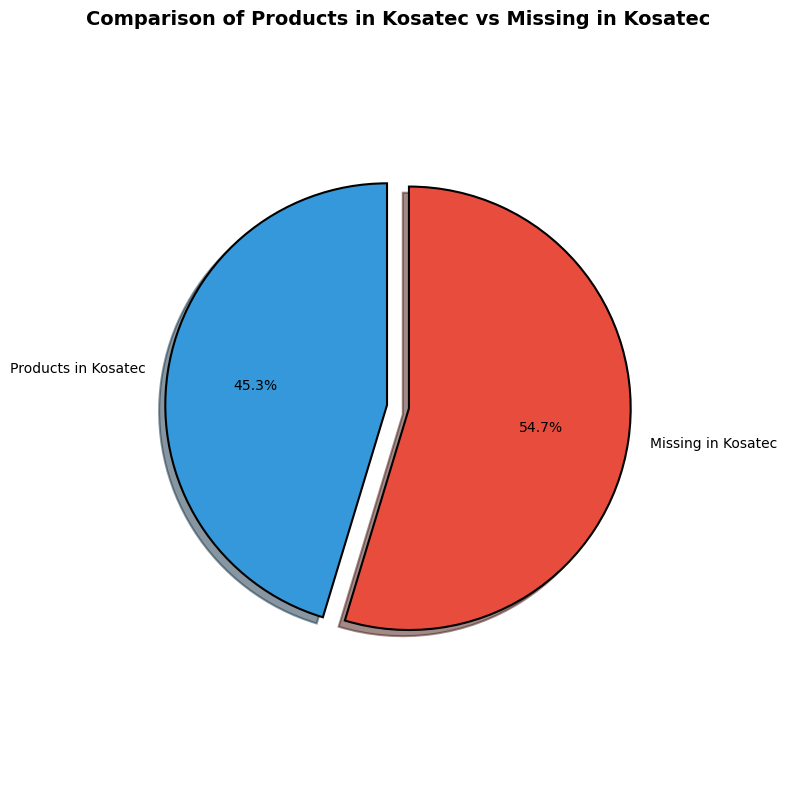

Gaps saved to 'kosatec_assortment_gaps.csv'


In [133]:
# Kosatec Assortment Gap Analysis and Visualization
# This script analyzes the assortment gaps between the external market (final_df) and Kosatec's product catalog (kosatec_df).
# It identifies missing products in Kosatec by comparing product identifiers such as product EAN, manufacturer number, and article number.
# The script also calculates the percentage of missing products and generates a visually appealing pie chart to display the results.

import pandas as pd
import matplotlib.pyplot as plt

# Standardize and rename identifier columns
kosatec_df.columns = [col.strip().lower().replace(" ", "_") for col in kosatec_df.columns]
kosatec_df.rename(columns={
    'product_code': 'product_article_number',
    'product_ean': 'product_ean',
    'manufacturer_number': 'manufacturer_number'
}, inplace=True)

# Ensure string dtype for key columns
for col in ['product_ean', 'manufacturer_number', 'product_article_number']:
    kosatec_df[col] = kosatec_df[col].astype(str)
    final_df[col] = final_df[col].astype(str)

# Identify Gaps – Products in external market but not in Kosatec
gap_ean = ~final_df['product_ean'].isin(kosatec_df['product_ean'])
gap_manu = ~final_df['manufacturer_number'].isin(kosatec_df['manufacturer_number'])
gap_article = ~final_df['product_article_number'].isin(kosatec_df['product_article_number'])

# Combine masks to identify any unmatched record
gap_mask = gap_ean & gap_manu & gap_article

# Extract Missing Products
assortment_gaps = final_df[gap_mask].copy()

# Remove obvious duplicates (optional but helps)
assortment_gaps = assortment_gaps.drop_duplicates(subset=[
    'product_ean', 'manufacturer_number', 'product_article_number'
])

# Output Stats
total_market_products = len(final_df)
gap_count = len(assortment_gaps)
gap_percent = (gap_count / total_market_products) * 100

# Print stats
print(f"Total Market Products: {total_market_products}")
print(f"Products Missing in Kosatec: {gap_count}")
print(f"Gap Percentage: {gap_percent:.2f}%")

# Create a more attractive Pie Chart
labels = ['Products in Kosatec', 'Missing in Kosatec']
values = [total_market_products - gap_count, gap_count]
explode = (0.1, 0)  # Explode the first slice (Products in Kosatec)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['#3498db', '#e74c3c'], startangle=90, 
        explode=explode, shadow=True, wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})

# Add title with larger font
plt.title('Comparison of Products in Kosatec vs Missing in Kosatec', fontsize=14, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Save the pie chart to a file
output_graph = "kosatec_assortment_gaps_attractive_pie_chart.png"
plt.savefig(output_graph, format='png', dpi=300)  # Save as PNG (use 'jpg' or 'pdf' for other formats)
print(f"Graph saved as '{output_graph}'")

# Show the plot
plt.tight_layout()
plt.show()

# Export Results to CSV
output_file = "kosatec_assortment_gaps.csv"
assortment_gaps.to_csv(output_file, index=False)
print(f"Gaps saved to '{output_file}'")


### Question#4:Top brands / manufacturers 
##### Which brands are most frequently represented?

In [237]:
# E-commerce Brand Normalization and Fuzzy Matching for Manufacturer Names
# This script reads data from 22 CSV files representing different online shops,
# performs fuzzy matching on manufacturer names to standardize them, and 
# outputs the top 5000 most frequent brands. The matched brands are then saved 
# to an Excel file for further analysis.

import pandas as pd
from rapidfuzz import fuzz, process

# Step 1: List of all 22 shop CSV files
file_paths = [
    'altron_28_02_2025.csv',
    'azerty_nl_27_02_2025.csv',
    'bechtle_26_02_2025.csv',
    'conard_26_02_2025.csv',
    'eetgroup_21_02_2025.csv',
    'jacob_26_02_2025.csv',
    'megekko_nl_21_02_2025.csv',
    'mindfactory_products.csv',
    'notebooksbilliger_25_02_2025.csv',
    'office-partner_26_02_2025.csv',
    'orderflow_21_02_2025.csv',
    'proshop_24_02_2025.csv',
    'reichelt_de_26_02_2025.csv',
    'senetic_21_02_2025.csv',
    'verkkokauppa_21_02_2025.csv',
    'alza_26_02_2025.csv',
    'cancom_21_02_2025.csv',
    'cyberport_25_02_2025.csv',
    'digitech_21_02_2025.csv',
    'galaxus_26_02_2025.csv',
    'Mironet_21_02_2025.csv',
    'bueromarkt_26_02_2025.csv'
]

# Step 2: Read and combine data
all_dataframes = []
for file in file_paths:
    try:
        df = pd.read_csv(file, encoding='ISO-8859-1', low_memory=False)
        df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]
        df['shop_name'] = file.split('.')[0]
        all_dataframes.append(df)
        print(f"✅ Loaded: {file}")
    except Exception as e:
        print(f"❌ Error in {file}: {e}")

combined_df = pd.concat(all_dataframes, ignore_index=True)

# Step 3: Clean manufacturer column
combined_df = combined_df.dropna(subset=['product_manufacturer'])
combined_df['product_manufacturer'] = combined_df['product_manufacturer'].astype(str).str.strip()

# Step 4: Get unique manufacturers and normalize to lowercase
unique_input_brands = combined_df['product_manufacturer'].unique()
reference_brands = pd.Series(unique_input_brands).drop_duplicates().str.lower().tolist()

# Step 5: Build fuzzy matching map with memoization using rapidfuzz
def build_brand_map(brands, threshold=80):
    brand_map = {}
    for brand in brands:
        normalized_brand = brand.lower()  # Normalize input brand to lowercase
        match = process.extractOne(normalized_brand, reference_brands, scorer=fuzz.ratio)
        if match and match[1] >= threshold:
            brand_map[brand] = match[0]
        else:
            brand_map[brand] = brand
    return brand_map

print("🔍 Running fuzzy matching...")
brand_map = build_brand_map(unique_input_brands)

# Step 6: Apply map to dataframe and normalize to title case (proper case)
combined_df['matched_brand'] = combined_df['product_manufacturer'].map(brand_map)
combined_df['matched_brand'] = combined_df['matched_brand'].str.title()  # Normalize to title case

# Step 7: Get top brands
brand_counts = combined_df['matched_brand'].value_counts().reset_index()
brand_counts.columns = ['brand', 'count']
top_brands = brand_counts.head(5000)

# Display the top brands
print("Top 5000 Brands / Manufacturers:")
display(top_brands)

# Step 8: Export top brands to CSV (optional)
top_brands.to_excel('top_brands_manufacturers.xlsx', index=False)
print("✅ Top brands saved to 'top_brands_manufacturers.xlsx'")


✅ Loaded: altron_28_02_2025.csv
✅ Loaded: azerty_nl_27_02_2025.csv
✅ Loaded: bechtle_26_02_2025.csv
✅ Loaded: conard_26_02_2025.csv
✅ Loaded: eetgroup_21_02_2025.csv
✅ Loaded: jacob_26_02_2025.csv
✅ Loaded: megekko_nl_21_02_2025.csv
✅ Loaded: mindfactory_products.csv
✅ Loaded: notebooksbilliger_25_02_2025.csv
✅ Loaded: office-partner_26_02_2025.csv
✅ Loaded: orderflow_21_02_2025.csv
✅ Loaded: proshop_24_02_2025.csv
✅ Loaded: reichelt_de_26_02_2025.csv
✅ Loaded: senetic_21_02_2025.csv
✅ Loaded: verkkokauppa_21_02_2025.csv
✅ Loaded: alza_26_02_2025.csv
✅ Loaded: cancom_21_02_2025.csv
✅ Loaded: cyberport_25_02_2025.csv
✅ Loaded: digitech_21_02_2025.csv
✅ Loaded: galaxus_26_02_2025.csv
✅ Loaded: Mironet_21_02_2025.csv
✅ Loaded: bueromarkt_26_02_2025.csv
🔍 Running fuzzy matching...
Top 5000 Brands / Manufacturers:


,brand,count
0,Phs-Memory,550736
1,Lenovo,84128
2,Noreve,78335
3,Apple,60238
4,Hp Enterprise,51134
...,...,...
4995,Tech Air,64
4996,Plan Toys,64
4997,Wrebbit,64
4998,Venta Luftwã¤Scher,64


✅ Top brands saved to 'top_brands_manufacturers.xlsx'


### Top 10 Brands Bar Chart

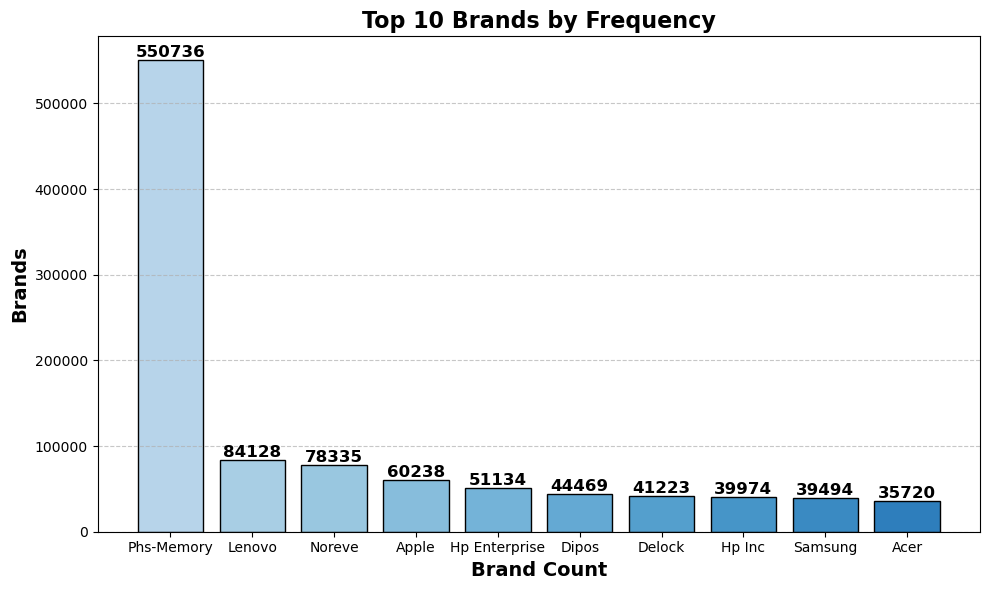

In [239]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming combined_df and brand_counts are already defined
top_brands = brand_counts.head(10)  # Get top 10 brands

# Create a more professional color gradient (using 'Blues' colormap for refinement)
colors = plt.cm.Blues(np.linspace(0.3, 0.7, len(top_brands)))  # Subtle gradient from light to dark

# Create a vertical bar chart with a professional layout
plt.figure(figsize=(10, 6))  # Adjust the figure size for readability
bars = plt.bar(top_brands['brand'], top_brands['count'], color=colors, edgecolor='black')

# Add labels on top of each bar for better clarity
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 50, f'{height}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Add labels and title with improved font style and size
plt.xlabel('Brand Count', fontsize=14, fontweight='bold')
plt.ylabel('Brands', fontsize=14, fontweight='bold')
plt.title('Top 10 Brands by Frequency', fontsize=16, fontweight='bold')

# Add gridlines to enhance readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


### Question#5:Top categories 
##### Which product categories dominate across external shops?

In [201]:
# This script processes a list of 22 e-commerce shop CSV files, combines their data, 
# and counts the occurrences of each product category across all shops. It then 
# displays and exports the top 5000 most frequent product categories to an Excel file 
# for further analysis or reporting.

import pandas as pd

# Step 1: List of all 22 shop CSV files (already provided)
file_paths = [
    'altron_28_02_2025.csv',
    'azerty_nl_27_02_2025.csv',
    'bechtle_26_02_2025.csv',
    'conard_26_02_2025.csv',
    'eetgroup_21_02_2025.csv',
    'jacob_26_02_2025.csv',
    'megekko_nl_21_02_2025.csv',
    'mindfactory_products.csv',
    'notebooksbilliger_25_02_2025.csv',
    'office-partner_26_02_2025.csv',
    'orderflow_21_02_2025.csv',
    'proshop_24_02_2025.csv',
    'reichelt_de_26_02_2025.csv',
    'senetic_21_02_2025.csv',
    'verkkokauppa_21_02_2025.csv',
    'alza_26_02_2025.csv',
    'cancom_21_02_2025.csv',
    'cyberport_25_02_2025.csv',
    'digitech_21_02_2025.csv',
    'galaxus_26_02_2025.csv',
    'Mironet_21_02_2025.csv',
    'bueromarkt_26_02_2025.csv'
]

# Step 2: Initialize an empty list to store the dataframes
all_dataframes = []

# Step 3: Loop through each file and read it
for file in file_paths:
    try:
        # Read the CSV file into a dataframe
        df = pd.read_csv(file, encoding='ISO-8859-1', low_memory=False)
        
        # Ensure column names are standardized (strip, lowercase, replace spaces with underscores)
        df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]
        
        # Add the shop name as a new column (filename without extension)
        shop_name = file.split('.')[0]
        df['shop_name'] = shop_name
        
        # Append the current dataframe to the list
        all_dataframes.append(df)
        
        print(f"Reading file: {shop_name}")  # Print the shop name as we read the file

    except Exception as e:
        print(f"Error reading {file}: {e}")

# Step 4: Combine all dataframes into one dataframe (union of all files)
combined_df = pd.concat(all_dataframes, ignore_index=True)

# Step 5: Count the occurrences of each product category
category_counts = combined_df['product_category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']

# Step 6: Display top categories by frequency
top_categories = category_counts.head(5000)

# Display the top categories
print("Top 5000 Product Categories:")
print(top_categories)

# Step 7: Export top categories to CSV (optional)
top_categories.to_excel('top_5000_product_categories.xlsx', index=False)
# print("Top categories saved to 'top_categories.csv'")


Reading file: altron_28_02_2025
Reading file: azerty_nl_27_02_2025
Reading file: bechtle_26_02_2025
Reading file: conard_26_02_2025
Reading file: eetgroup_21_02_2025
Reading file: jacob_26_02_2025
Reading file: megekko_nl_21_02_2025
Reading file: mindfactory_products
Reading file: notebooksbilliger_25_02_2025
Reading file: office-partner_26_02_2025
Reading file: orderflow_21_02_2025
Reading file: proshop_24_02_2025
Reading file: reichelt_de_26_02_2025
Reading file: senetic_21_02_2025
Reading file: verkkokauppa_21_02_2025
Reading file: alza_26_02_2025
Reading file: cancom_21_02_2025
Reading file: cyberport_25_02_2025
Reading file: digitech_21_02_2025
Reading file: galaxus_26_02_2025
Reading file: Mironet_21_02_2025
Reading file: bueromarkt_26_02_2025
Top 5000 Product Categories:
                                               category   count
0     Alle Kategorien | PC & ZubehÃ¶r | Komponenten ...  344327
1                              Alle Kategorien | Divers  268424
2     Gesamtsortime